# 05과 실전 단변량분석 : 종합실습

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings   
warnings.filterwarnings("ignore")  # 향후 버전에서 제외될 수 있다는 경고 메시지 감추기

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [12]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


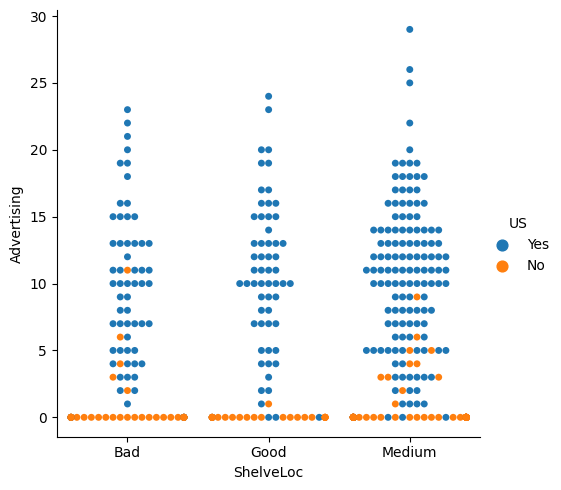

In [41]:
sns.catplot(data=data, kind ="swarm", x="ShelveLoc", y="Advertising", hue="US")

### ① Sales (Target) 

In [5]:
var = 'Sales'

1) 변수의 비즈니스 의미

- 각 지역의 판매량(단위: 1000개)

2) 숫자, 범주?

- 숫자

3) NaN 존재 유무 및 조치방안

In [ ]:
data['Sales'].isna().sum()

- NaN 값 없음

4) 가변수화 필요 여부

- 숫자형이므로 필요하지 않음

5) 기초통계량(수치화)

In [13]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

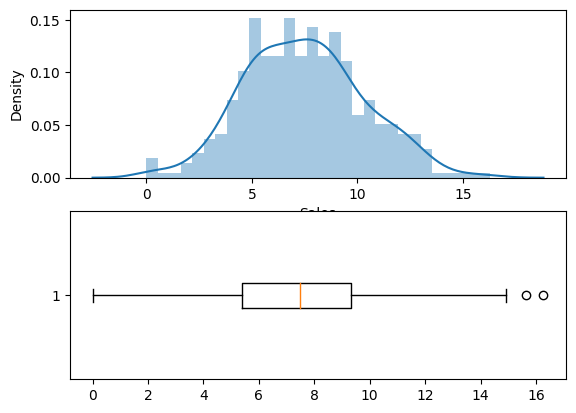

In [24]:
plt.subplot(2, 1, 1)
sns.distplot(data['Sales'], hist=True, bins=30)

plt.subplot(2, 1, 2)
plt.boxplot(data['Sales'], vert=False)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 일반적으로 평균에 값이 많이 분포되어 있으나, 일부 빈도 수가 높은 구간 존재
    - 빈도 수가 높은 구간 내 매장 간 공통점이 있는지 확인
- 0에 가까운 값에 갑자기 빈도 수 높아지는 구간 있음
    - 해당 구역 내 매장의 소득 관계 확인

8) 추가 분석해 볼 사항이 있나요?

- 지역 평균 소득과 판매량과의 상관 관계
- 지역 인구수와 판매량과의 상관 관계

### ② CompPrice

In [ ]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

- 경쟁사 가격(단위: 달러)

2) 숫자, 범주?

- 숫자형 데이터

3) NaN 존재 유무 및 조치방안

In [20]:
data['CompPrice'].isnull().sum()

0

- NaN 값 없음

4) 가변수화 필요 여부

- 숫자형 데이터이므로 가변수화 필요 없음

5) 기초통계량(수치화)

In [21]:
data['CompPrice'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

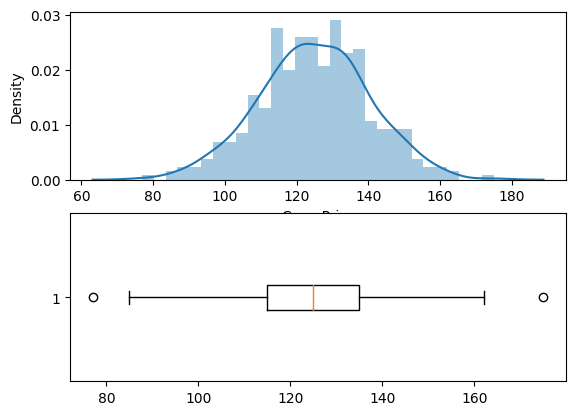

In [25]:
plt.subplot(2, 1, 1)
sns.distplot(data['CompPrice'], hist=True, bins=30)

plt.subplot(2, 1, 2)
plt.boxplot(data['CompPrice'], vert=False)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 표준분포에 가까우나 일부 빈도 수가 높은 구간 있음
- boxplot에서 fence 범위를 넘는 이상치 확인
    - 해당 지역의 자사 제품 Sales 확인

8) 추가 분석해 볼 사항이 있나요?

- 경쟁사 가격과 각 지역 판매량 간의 관계
- 경쟁사 가격과 지역 평균 소득 간의 관계

### ③ Income

In [ ]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [ ]:
data[var].isna().sum()

* NAN 없음

4) 가변수화 필요 여부

* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [ ]:
data[var].describe()

6) 분포 확인(시각화)

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 전 연령에 대한 인구별 평균 소득액? 성인에 대한 평균 소득액?
* 2만달러 ~ 12만 달러 이므로 연간 소득일 것.
* 50%가 약 4만달러 ~ 9만달러

8) 추가 분석해 볼 사항이 있나요?

* 평균 소득과 카시트 판매량과의 관계
* 평균 소득과 카시트 가격과의 관계

### ④ Advertising

In [ ]:
var = 'Advertising'

1) 변수의 비즈니스 의미

- 각 지역, 회사의 관고 예산(단위: 1000달러)

2) 숫자, 범주?

- 숫자형 데이터

3) NaN 존재 유무 및 조치방안

In [26]:
data['Advertising'].isnull().sum()

0

- NAN 값 없음

4) 가변수화 필요 여부

- 숫자형 데이터이므로 가변수화 필요 X

5) 기초통계량(수치화)

In [27]:
data['Advertising'].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

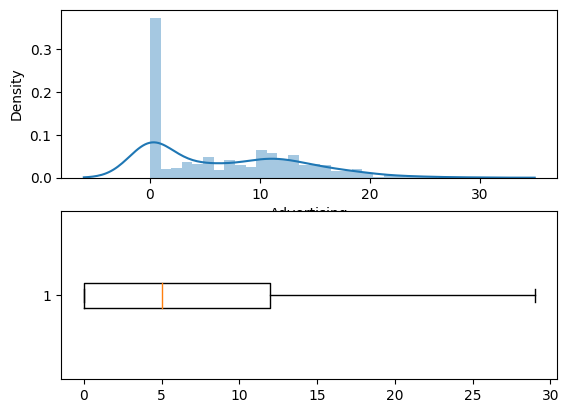

In [28]:
plt.subplot(2, 1, 1)
sns.distplot(data['Advertising'], hist=True, bins=30)

plt.subplot(2, 1, 2)
plt.boxplot(data['Advertising'], vert=False)
plt.show()

- 0과 같이 한 쪽에 데이터가 몰려있는 경우 박스플롯 상 이상치가 잘 집계되지 않음

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 25%가 예산 없음, 50%가 5000달러 이하의 예산
    - 해외 지사와 광고 예산 간의 관계가 있을 수도
    - 예산이 없는 지역과 있는 지역을 분리해서 분석할 필요있음
- 광고 예산 최대치와 평균값 차이가 큼

8) 추가 분석해 볼 사항이 있나요?

- 예산이 없는 지역과 있는 지역을 분리해서 분석
    - 광고 예산과 매장 미국 여부 사이 관계
- 광고 예산과 도심 지역 여부 관계

### ⑤ Population

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑦ ShelveLoc

1) 변수의 비즈니스 의미

2) 숫자, 범주?

3) NaN 존재 유무 및 조치방안

4) 가변수화 필요 여부

5) 기초통계량(수치화)

6) 분포 확인(시각화)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

In [ ]:
var = 'Age'

1) 변수의 비즈니스 의미

- 지역 인구의 평균 연령

2) 숫자, 범주?

- 숫자형

3) NaN 존재 유무 및 조치방안

- NA 값 없음

4) 가변수화 필요 여부

- 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [39]:
data['Age'].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

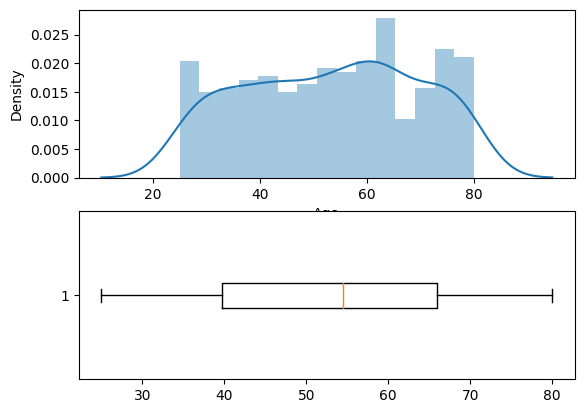

In [40]:
plt.subplot(2, 1, 1)
sns.distplot(data['Age'], hist=True, bins=15)

plt.subplot(2, 1, 2)
plt.boxplot(data['Age'], vert=False)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 평균 연령이 60대 초반인 지역이 많음 > 어떤 지역일지?
    - 평균 연령이 60대 중반인 지역은 급격하게 줄어듦
- 평균 연령이 20대 초반인 지역은 대학가로 추정
    - 혹은 10세 이하 자녀 + 30 ~ 40대 부모의 평균 연령
- 평균 나이가 거의 균등 분포로 보임
    - 인위적으로 구간을 정해서 모은 것인지?
    - 이상치를 이미 처리한 것인지? 

8) 추가 분석해 볼 사항이 있나요?

- 가장 판매량이 높은 평균 나이는?

### ⑨ Urban

In [ ]:
var = 'Urban'

1) 변수의 비즈니스 의미

- 도심 지역 여부

2) 숫자, 범주?

- 범주형 데이터 (Y/N)

3) NaN 존재 유무 및 조치방안

In [29]:
data['Urban'].isna().sum()

0

- NAN값 없음

4) 가변수화 필요 여부

- 'Yes', 'No'로 이루어진 범주형 데이터이므로 가변수화 필요

5) 기초통계량(수치화)

In [33]:
print(data['Urban'].value_counts())
print()
print(data['Urban'].value_counts()/data.shape[0])

Yes    282
No     118
Name: Urban, dtype: int64

Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

[]

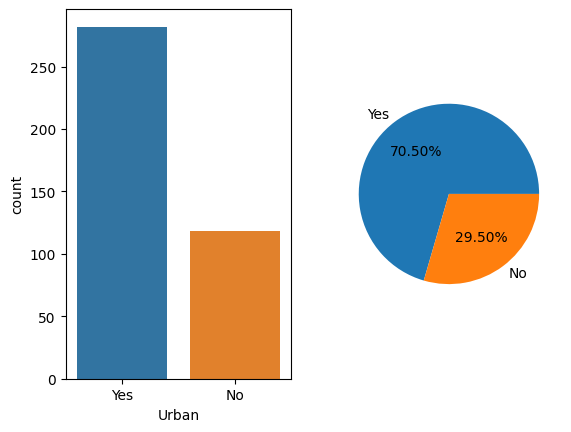

In [34]:
plt.subplot(1, 2, 1)
sns.countplot(data['Urban'])

plt.subplot(1, 2, 2)
ub = data['Urban'].value_counts()
plt.pie(ub.values, labels=ub.index, autopct='%.2f%%')

plt.plot()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 도심 지역에 있는 매장이 70% 가량 차지
- 도심 > 특히 어느 지역에 매장이 많은지? 차량을 많이 사용해야 하는 비도심 지역이 카시트 구매율이 높지 않을지?

8) 추가 분석해 볼 사항이 있나요?

- 도심 지역에 있는 매장의 판매량과 비도심 지역 매장 판매량 비교
- 도심 여부와 인구수 사이 관계
- 도심 여부와 평균 소득 사이 관계 

### ⑩ US

In [ ]:
var = 'US'

1) 변수의 비즈니스 의미

- 매장이 미국에 있는지 여부

2) 숫자, 범주?

- 범주형 데이터

3) NaN 존재 유무 및 조치방안

In [35]:
data['US'].isna().sum()

0

- NAN 값 존재 X

4) 가변수화 필요 여부

- 'Yes', 'No'로 이루어진 범주형 데이터이므로 가변수화 필요

5) 기초통계량(수치화)

In [36]:
print(data['US'].value_counts())
print()
print(data['US'].value_counts()/data.shape[0])

Yes    258
No     142
Name: US, dtype: int64

Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

[]

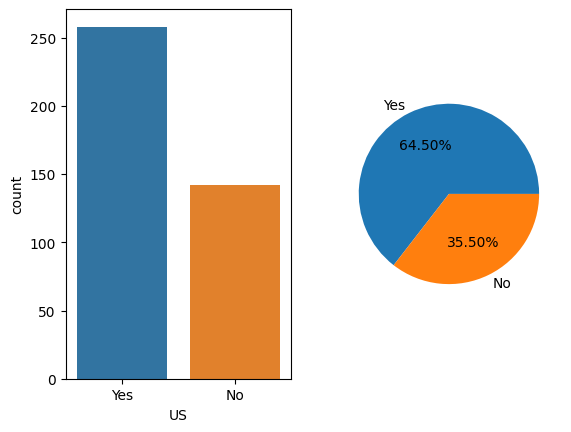

In [37]:
plt.subplot(1, 2, 1)
sns.countplot(data['US'])

plt.subplot(1, 2, 2)
ub = data['US'].value_counts()
plt.pie(ub.values, labels=ub.index, autopct='%.2f%%')

plt.plot()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 미국 내 매장의 경우 도심/비도심 비율 차이
- 미국 외 매장의 경우 도심/비도심 비율 차이
    - 미국 외 매장의 경우 도심에 있을 확률이 높음

8) 추가 분석해 볼 사항이 있나요?

- 미국 매장 유무와 도심/비도심 사이 관계
- 미국 매장 유무와 경쟁사 가격 관계
- 미국 매장 유무와 평균 소득 관계